In [1]:
from itertools import product

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pop_tools
import xpersist as xp

import util

Cannot write to data cache folder '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.


In [2]:
clobber = False

## Get the model grid and generate region mask
Where we are using the [pop_tools](https://pop-tools.readthedocs.io/en/latest/examples/get-model-grid.html) package. This reads the same binary files that the model read to generate the grid online.

In [3]:
grid = pop_tools.get_grid('POP_gx1v6')
grid

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.473e+06
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.046e+06 5.046e+06
    DXU          (nlat, nlon) float64 2.397e+06 2.397e+06 ... 1.391e+06
    DYU          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.493e+06 5.493e+06
    TAREA        (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.432e+12
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 7.639e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
Attributes:
    lateral_dims:         [384, 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [4]:
jnx = np.where(grid.TLAT[:, 0] <= -30)[0]
lat_slice = slice(jnx[0], jnx[-1]+1)
grid = grid.isel(nlat=lat_slice)
grid

<xarray.Dataset>
Dimensions:      (nlat: 93, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -30.08 -30.08
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 317.2 318.3 319.4
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... -29.82 -29.82
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 317.8 318.9 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.082e+07
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.864e+06 5.864e+06
    DXU          (nlat, nlon) float64 2.397e+06 2.397e+06 ... 1.085e+07
    DYU          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.842e+06 5.842e+06
    TAREA        (nlat, nlon) float64 1.125e+13 1.125e+13 ... 6.346e+13
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 6.339e+13
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 ... 35 44 49 52 53 53 53 54
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 6 6 6 6 6 6 6 6 6
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
Attributes:
    lateral_dims:         [384, 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

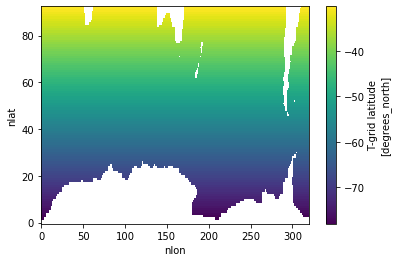

In [5]:
grid.TLAT.where(grid.KMT>0).plot();

In [6]:
# define a list of tuples describing our regions: (region_name, logical_array)
so_logic = (grid.TLAT <= -45)
mask_logic = [
    ('Southern Ocean', so_logic), 
    ('WAP & Atlantic', so_logic & ((grid.TLONG > 260) | (grid.TLONG < 25))),
#    ('Indo-Pacific', so_logic & ~((grid.TLONG > 260) | (grid.TLONG < 25))),    
]

# create a region coordinate with the region names
region = xr.DataArray(
    [t[0] for t in mask_logic], 
    dims=('region'), 
)
nregion = len(region)


# create a masked array array
masked_area = xr.DataArray(
    np.zeros((nregion,)+grid.TLAT.shape), 
    dims=('region',)+grid.TLAT.dims,
    coords={'region': region},
    name='masked_area',
)
for i, name_logic in enumerate(mask_logic):
    masked_area.data[i, :, :] = grid.TAREA.where(name_logic[1]).fillna(0.).where(grid.KMT>0)

# subset to the lat range from above
masked_area = masked_area.isel(nlat=lat_slice)
masked_area    

<xarray.DataArray 'masked_area' (region: 2, nlat: 93, nlon: 320)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.52530781e+13, 1.52530781e+13, 1.52530781e+13, ...,
                    nan,            nan,            nan],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.52530781e+13, 1.52530781e+13, 1.52530781e+13, ...,
                    nan,            nan,            nan],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * region   (region) <U14 'Southern Ocean' 'WAP & Atlantic'
Dimensions without coordinates: nlat, nlon

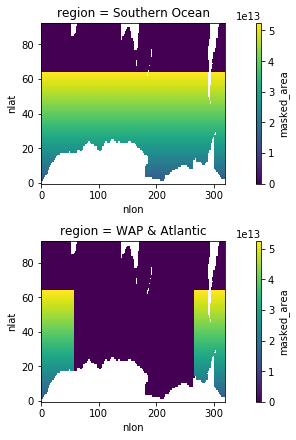

In [7]:
ncol = int(np.sqrt(nregion))
nrow = int(nregion/ncol) + min(1, nregion%ncol)

fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow),
                       constrained_layout=True)

for i, region in enumerate(masked_area.region.values):
    plt.axes(ax.ravel()[i])
    masked_area.sel(region=region).plot()    

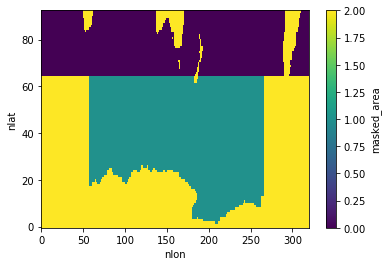

In [8]:
masked_area.where(masked_area==0).fillna(1.).sum('region').plot();

## Open Global Dataset

In [9]:
ds_djf_obs = xr.open_zarr(f'{util.project_tmpdir}/oisst-avhrr-v02r01.1990-2019_DJF.POP_gx1v6.zarr')
ds_djf_obs

,Array,Chunk
Bytes,28.51 MB,983.04 kB
Shape,"(29, 384, 320)","(1, 384, 320)"
Count,30 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,28.51 MB,983.04 kB
Shape,"(29, 384, 320)","(1, 384, 320)"
Count,30 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


### Clip it to SO

In [10]:
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['anom', 'err','ice','sst']

ds_obs = ds_djf_obs[data_vars+grid_vars].isel(nlat=lat_slice)
ds_obs

,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


## Run to generate regional time series:

In [11]:
%%time
name = 'roisst-djf-regional-timeseries'
@xp.persist_ds(name=name, format='zarr', path='data', trust_cache=True, clobber=clobber)
def regional_means():
    
    ds_djf = ds_obs

    #ds_djf = xr.open_zarr(f'{util.project_tmpdir}/cesm-le-fields-djf.zarr')
    
    dim = ['nlat', 'nlon']
    area_total = masked_area.sum(dim)
    weights = masked_area / area_total
    weights_sum = weights.sum(dim)

    # ensure that the weights add to 1.
    np.testing.assert_allclose(weights_sum.where(weights_sum != 0.).fillna(1.), 1.0, rtol=1e-7)

    with xr.set_options(keep_attrs=True):
        ds_djf_regional = (ds_djf[list(ds_djf.data_vars)] * weights).sum(dim).compute()

    return ds_djf_regional

ds_djf_regional = regional_means()
ds_djf_regional

writing cache file: data/roisst-djf-regional-timeseries.zarr
CPU times: user 468 ms, sys: 82.6 ms, total: 550 ms
Wall time: 2.19 s


<xarray.Dataset>
Dimensions:  (region: 2, time: 29)
Coordinates:
  * time     (time) int64 1991 1992 1993 1994 1995 ... 2015 2016 2017 2018 2019
  * region   (region) <U14 'Southern Ocean' 'WAP & Atlantic'
Data variables:
    anom     (time, region) float64 -0.3425 -0.3742 -0.0603 ... -0.092 -0.1969
    err      (time, region) float64 0.3491 0.2871 0.3543 ... 0.2608 0.2593
    ice      (time, region) float64 0.07561 0.1054 0.07389 ... 0.1079 0.1408
    sst      (time, region) float64 4.117 3.465 4.405 ... 3.876 4.368 3.642
    KMT      (time, region) float64 52.16 51.3 52.16 51.3 ... 51.3 52.16 51.3
    TAREA    (time, region) float64 4.065e+13 4.015e+13 ... 4.065e+13 4.015e+13